In [387]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import defaultdict

# Load collected queries from the GLACIATION platform

In [388]:
with open('timestamps.txt', 'r') as f:
    lines = f.readlines()

print(lines[:5])
print(lines[-5:])

['2025-02-04T16:59:47.252850411Z\n', '2025-02-04T16:59:47.135700992Z\n', '2025-02-04T16:59:46.945367544Z\n', '2025-02-04T16:58:55.240473056Z\n', '2025-02-04T16:58:50.298201242Z\n']
['2025-02-19T11:01:11.581328614Z\n', '2025-02-19T11:00:56.277260448Z\n', '2025-02-19T11:00:55.583398755Z\n', '2025-02-19T11:00:54.575745953Z\n', '2025-02-19T11:00:53.681519734Z\n']


In [389]:
with open('queries.txt', 'r') as f:
    lines = f.readlines()

print(f'Total queries: {len(lines)} ')

Total queries: 65719 


In [390]:
# filter drop queries
lines = [l for l in lines if 'DROP' not in l and 'drop' not in l]
print(f'Total queries: {len(lines)} ')

Total queries: 61989 


In [391]:
def query2dict(queries: list) -> dict:
    qdict = defaultdict(int)
    for q in queries:
        qdict[q] += 1
    return qdict

In [392]:
qdict = query2dict(lines)
df = pd.DataFrame({
    'query': qdict.keys(),
    'count': qdict.values()
})

df = df.sort_values(by='count', ascending=False)

print(f'Distinct queries: {len(df)}')

df

Distinct queries: 909


,query,count
1,"PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> PREFIX xsd: <http://www.w3.org/2001/XMLSchema#> SELECT ?resource ?statusValue WHERE { { SELECT ?graphURI WHERE { GRAPH ?graphURI {} FILTER regex(str(?graphURI), ""^timestamp:"") } ORDER BY DESC(xsd:integer(replace(str(?graphURI), ""^timestamp:"", """"))) LIMIT 1 } GRAPH ?graphURI { SELECT ?pod ?resource ?statusValue WHERE { ?resource rdf:type <glc:WorkProducingResource>. ?resource <glc:hasDescription> ""Container"". ?resource <glc:hasStatus> ?status. ?status <glc:hasDescription> ?statusValue. FILTER NOT EXISTS{ ?status <glc:hasDescription> 'Succeeded' }. FILTER NOT EXISTS{ ?status <glc:hasDescription> 'Failed' }. FILTER NOT EXISTS{ ?status <glc:hasDescription> 'Unknown' }. FILTER NOT EXISTS{ ?status <glc:hasDescription> 'NotReady' }. FILTER NOT EXISTS{ ?status <glc:hasDescription> 'terminated' }. } } }\n",17708
0,"PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> PREFIX xsd: <http://www.w3.org/2001/XMLSchema#> SELECT ?resource ?statusValue WHERE { { SELECT ?graphURI WHERE { GRAPH ?graphURI {} FILTER regex(str(?graphURI), ""^timestamp:"") } ORDER BY DESC(xsd:integer(replace(str(?graphURI), ""^timestamp:"", """"))) LIMIT 1 } GRAPH ?graphURI { SELECT ?pod ?resource ?statusValue WHERE { ?resource rdf:type <glc:WorkProducingResource>. ?resource <glc:hasDescription> ""KubernetesWorkerNode"". ?resource <glc:hasStatus> ?status. ?status <glc:hasDescription> ?statusValue. FILTER NOT EXISTS{ ?status <glc:hasDescription> 'Succeeded' }. FILTER NOT EXISTS{ ?status <glc:hasDescription> 'Failed' }. FILTER NOT EXISTS{ ?status <glc:hasDescription> 'Unknown' }. FILTER NOT EXISTS{ ?status <glc:hasDescription> 'NotReady' }. FILTER NOT EXISTS{ ?status <glc:hasDescription> 'terminated' }. } } }\n",17708
2,"PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> PREFIX xsd: <http://www.w3.org/2001/XMLSchema#> SELECT ?resource ?statusValue WHERE { { SELECT ?graphURI WHERE { GRAPH ?graphURI {} FILTER regex(str(?graphURI), ""^timestamp:"") } ORDER BY DESC(xsd:integer(replace(str(?graphURI), ""^timestamp:"", """"))) LIMIT 1 } GRAPH ?graphURI { SELECT ?pod ?resource ?statusValue WHERE { ?resource rdf:type <glc:WorkProducingResource>. ?resource <glc:hasDescription> ""Pod"". ?resource <glc:hasStatus> ?status. ?status <glc:hasDescription> ?statusValue. FILTER NOT EXISTS{ ?status <glc:hasDescription> 'Succeeded' }. FILTER NOT EXISTS{ ?status <glc:hasDescription> 'Failed' }. FILTER NOT EXISTS{ ?status <glc:hasDescription> 'Unknown' }. FILTER NOT EXISTS{ ?status <glc:hasDescription> 'NotReady' }. FILTER NOT EXISTS{ ?status <glc:hasDescription> 'terminated' }. } } }\n",17707
3,"PREFIX xsd: <http://www.w3.org/2001/XMLSchema#> SELECT ?graphURI WHERE { GRAPH ?graphURI {} FILTER regex(str(?graphURI), ""^timestamp:"") } # ORDER BY ASC(xsd:integer(replace(str(?graphURI), ""^timestamp:"", """")))\n",6838
4,"PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> PREFIX glc: <https://glaciation-project.eu/MetadataReferenceModel#> PREFIX saref: <https://saref.etsi.org/core/> SELECT * WHERE { { GRAPH ?g { ?s saref:hasIdentifier ?robotId . ?s glc:hasSubResource ?yolo . ?yolo glc:makesMeasurement ?label . ?label saref:relatesToProperty glc:name . ?label saref:hasValue ?v . ?yolo glc:makesMeasurement ?conf . ?conf saref:relatesToProperty glc:confidence . ?conf saref:hasValue ?confVal . } } FILTER (STRSTARTS(STR(?g), 'https://glaciation-project.eu/uc/2')) }\n",1088
...,...,...
311,"PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> PREFIX xsd: <http://www.w3.org/2001/XMLSchema#> SELECT ?pod ?node ?measurement ?measurementName ?timestamp ?unit ?value ?startTime ?endTime WHERE { BIND(1738954800000 as ?intervalStart). BIND(1738956600000 as ?intervalEnd). { SELECT ?graphURI ?timeslice WHERE { GRAPH ?graphURI {} FILTER regex(str(?graphURI), ""^timestamp:"") BIND(xsd:integer(replace(str(?graphURI), ""^timestamp:"", """")) as ?timeslice). 

[17708, 17708, 17707, 6838, 1088, 15, 8, 4, 4, 4, 4, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

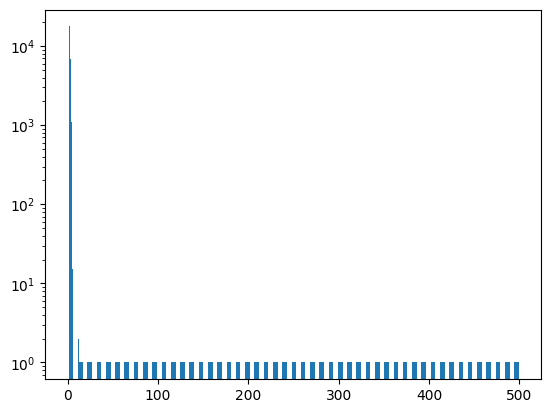

Count > 1 queries: 13


In [393]:
num_to_plot = 500

print( list(df['count']))
fig, ax = plt.subplots()
ax.bar(list(range(num_to_plot)), list(df['count'])[:num_to_plot], width=0.5)
ax.set_yscale('log')
# ax.hist(list(df['count']), bins=3)
plt.show()

print(f'Count > 1 queries: {len(df.loc[df["count"]>1])}')

# Entropy of queries and distinct ones

In [394]:
def entropy(probs: list) -> float:
    """ Return entropy of list of probabilities """
    return -sum([p*np.log(p) for p in probs])

In [395]:
uniform_entropy = np.log(len(lines))
print(f'Uniform entropy: {uniform_entropy}')

query_entropy = entropy([x/len(lines) for x in df["count"]])
print(f'Query as template entropy: {query_entropy}')

Uniform entropy: 11.034712228931713
Query as template entropy: 1.5538553596251987


In [396]:
with open('distinct_sorted_templates.txt', 'r') as f:
    lines = f.readlines()

from collections import Counter

templates = Counter(lines)
len(templates)

909

In [397]:
print(df.iloc[0]['query'])

PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>             PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>             SELECT ?resource ?statusValue             WHERE {                 {                     SELECT ?graphURI WHERE {                         GRAPH ?graphURI {}                         FILTER regex(str(?graphURI), "^timestamp:")                     }                     ORDER BY DESC(xsd:integer(replace(str(?graphURI), "^timestamp:", "")))                     LIMIT 1                 }                 GRAPH ?graphURI {                     SELECT ?pod ?resource ?statusValue WHERE {                         ?resource rdf:type <glc:WorkProducingResource>.                         ?resource <glc:hasDescription> "Container".                         ?resource <glc:hasStatus> ?status.                         ?status <glc:hasDescription> ?statusValue.                         FILTER NOT EXISTS{ ?status <glc:hasDescription> 'Succeeded' }.                         FILTER NOT EX

In [398]:
print(df.iloc[1]['query'])

PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>             PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>             SELECT ?resource ?statusValue             WHERE {                 {                     SELECT ?graphURI WHERE {                         GRAPH ?graphURI {}                         FILTER regex(str(?graphURI), "^timestamp:")                     }                     ORDER BY DESC(xsd:integer(replace(str(?graphURI), "^timestamp:", "")))                     LIMIT 1                 }                 GRAPH ?graphURI {                     SELECT ?pod ?resource ?statusValue WHERE {                         ?resource rdf:type <glc:WorkProducingResource>.                         ?resource <glc:hasDescription> "KubernetesWorkerNode".                         ?resource <glc:hasStatus> ?status.                         ?status <glc:hasDescription> ?statusValue.                         FILTER NOT EXISTS{ ?status <glc:hasDescription> 'Succeeded' }.                         FI

In [399]:
print(df.iloc[2]['query'])

PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>             PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>             SELECT ?resource ?statusValue             WHERE {                 {                     SELECT ?graphURI WHERE {                         GRAPH ?graphURI {}                         FILTER regex(str(?graphURI), "^timestamp:")                     }                     ORDER BY DESC(xsd:integer(replace(str(?graphURI), "^timestamp:", "")))                     LIMIT 1                 }                 GRAPH ?graphURI {                     SELECT ?pod ?resource ?statusValue WHERE {                         ?resource rdf:type <glc:WorkProducingResource>.                         ?resource <glc:hasDescription> "Pod".                         ?resource <glc:hasStatus> ?status.                         ?status <glc:hasDescription> ?statusValue.                         FILTER NOT EXISTS{ ?status <glc:hasDescription> 'Succeeded' }.                         FILTER NOT EXISTS{ 

In [400]:
print(df.iloc[3]['query'])

PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>  SELECT ?graphURI WHERE {   GRAPH ?graphURI {}   FILTER regex(str(?graphURI), "^timestamp:") } # ORDER BY ASC(xsd:integer(replace(str(?graphURI), "^timestamp:", "")))



In [401]:
print(df.iloc[4]['query'])

PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>     PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>     PREFIX glc: <https://glaciation-project.eu/MetadataReferenceModel#>     PREFIX saref: <https://saref.etsi.org/core/>      SELECT * WHERE {         { GRAPH ?g              {             ?s saref:hasIdentifier ?robotId .             ?s glc:hasSubResource ?yolo .             ?yolo glc:makesMeasurement ?label .             ?label saref:relatesToProperty glc:name .             ?label saref:hasValue ?v .             ?yolo glc:makesMeasurement ?conf .             ?conf saref:relatesToProperty glc:confidence .             ?conf saref:hasValue ?confVal .             }         }          FILTER (STRSTARTS(STR(?g), 'https://glaciation-project.eu/uc/2'))     }



In [309]:
print(df.iloc[120]['query'])

PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>  SELECT ?pod ?node ?measurement ?measurementName ?timestamp ?unit ?value ?startTime ?endTime WHERE {   BIND(1739235600000 as ?intervalStart).   BIND(1739237400000 as ?intervalEnd).   {     SELECT ?graphURI ?timeslice WHERE {       GRAPH ?graphURI {}       FILTER regex(str(?graphURI), "^timestamp:")       BIND(xsd:integer(replace(str(?graphURI), "^timestamp:", "")) as ?timeslice).     }   }   FILTER(?timeslice >= ?intervalStart && ?timeslice < ?intervalEnd)   GRAPH ?graphURI {     {       SELECT ?pod ?measurement ?node ?measurementName ?ts ?value ?unit ?startTime ?endTime WHERE {         ?pod <glc:hasDescription> "Pod".         ?pod <glc:hasMeasurement> ?measurement.         ?pod <glc:consumes> ?node.         ?measurement <glc:hasDescription> ?measurementName.         ?measurement <glc:hasTimestamp> ?ts.         ?measurement <glc:hasValue> ?value.         ?measurement <glc:measuredI

In [310]:
print(df.iloc[-1]['query'])

PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>  SELECT ?pod ?node ?measurement ?measurementName ?timestamp ?unit ?value ?startTime ?endTime WHERE {   BIND(1738944000000 as ?intervalStart).   BIND(1738945800000 as ?intervalEnd).   {     SELECT ?graphURI ?timeslice WHERE {       GRAPH ?graphURI {}       FILTER regex(str(?graphURI), "^timestamp:")       BIND(xsd:integer(replace(str(?graphURI), "^timestamp:", "")) as ?timeslice).     }   }   FILTER(?timeslice >= ?intervalStart && ?timeslice < ?intervalEnd)   GRAPH ?graphURI {     {       SELECT ?pod ?measurement ?node ?measurementName ?ts ?value ?unit ?startTime ?endTime WHERE {         ?pod <glc:hasDescription> "Pod".         ?pod <glc:hasMeasurement> ?measurement.         ?pod <glc:consumes> ?node.         ?measurement <glc:hasDescription> ?measurementName.         ?measurement <glc:hasTimestamp> ?ts.         ?measurement <glc:hasValue> ?value.         ?measurement <glc:measuredI

In [402]:
import re

pattern = r"<glc:([^>]+)>"
replacement = r"<https://glaciation-project.eu/MetadataReferenceModel/1.0.0/#\1>"

with open('distict_sorted_queries.txt', 'w') as f:
    for q in df['query'].values:
        f.write(re.sub(pattern, replacement, q))

In [403]:
df

,query,count
1,"PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> PREFIX xsd: <http://www.w3.org/2001/XMLSchema#> SELECT ?resource ?statusValue WHERE { { SELECT ?graphURI WHERE { GRAPH ?graphURI {} FILTER regex(str(?graphURI), ""^timestamp:"") } ORDER BY DESC(xsd:integer(replace(str(?graphURI), ""^timestamp:"", """"))) LIMIT 1 } GRAPH ?graphURI { SELECT ?pod ?resource ?statusValue WHERE { ?resource rdf:type <glc:WorkProducingResource>. ?resource <glc:hasDescription> ""Container"". ?resource <glc:hasStatus> ?status. ?status <glc:hasDescription> ?statusValue. FILTER NOT EXISTS{ ?status <glc:hasDescription> 'Succeeded' }. FILTER NOT EXISTS{ ?status <glc:hasDescription> 'Failed' }. FILTER NOT EXISTS{ ?status <glc:hasDescription> 'Unknown' }. FILTER NOT EXISTS{ ?status <glc:hasDescription> 'NotReady' }. FILTER NOT EXISTS{ ?status <glc:hasDescription> 'terminated' }. } } }\n",17708
0,"PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> PREFIX xsd: <http://www.w3.org/2001/XMLSchema#> SELECT ?resource ?statusValue WHERE { { SELECT ?graphURI WHERE { GRAPH ?graphURI {} FILTER regex(str(?graphURI), ""^timestamp:"") } ORDER BY DESC(xsd:integer(replace(str(?graphURI), ""^timestamp:"", """"))) LIMIT 1 } GRAPH ?graphURI { SELECT ?pod ?resource ?statusValue WHERE { ?resource rdf:type <glc:WorkProducingResource>. ?resource <glc:hasDescription> ""KubernetesWorkerNode"". ?resource <glc:hasStatus> ?status. ?status <glc:hasDescription> ?statusValue. FILTER NOT EXISTS{ ?status <glc:hasDescription> 'Succeeded' }. FILTER NOT EXISTS{ ?status <glc:hasDescription> 'Failed' }. FILTER NOT EXISTS{ ?status <glc:hasDescription> 'Unknown' }. FILTER NOT EXISTS{ ?status <glc:hasDescription> 'NotReady' }. FILTER NOT EXISTS{ ?status <glc:hasDescription> 'terminated' }. } } }\n",17708
2,"PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> PREFIX xsd: <http://www.w3.org/2001/XMLSchema#> SELECT ?resource ?statusValue WHERE { { SELECT ?graphURI WHERE { GRAPH ?graphURI {} FILTER regex(str(?graphURI), ""^timestamp:"") } ORDER BY DESC(xsd:integer(replace(str(?graphURI), ""^timestamp:"", """"))) LIMIT 1 } GRAPH ?graphURI { SELECT ?pod ?resource ?statusValue WHERE { ?resource rdf:type <glc:WorkProducingResource>. ?resource <glc:hasDescription> ""Pod"". ?resource <glc:hasStatus> ?status. ?status <glc:hasDescription> ?statusValue. FILTER NOT EXISTS{ ?status <glc:hasDescription> 'Succeeded' }. FILTER NOT EXISTS{ ?status <glc:hasDescription> 'Failed' }. FILTER NOT EXISTS{ ?status <glc:hasDescription> 'Unknown' }. FILTER NOT EXISTS{ ?status <glc:hasDescription> 'NotReady' }. FILTER NOT EXISTS{ ?status <glc:hasDescription> 'terminated' }. } } }\n",17707
3,"PREFIX xsd: <http://www.w3.org/2001/XMLSchema#> SELECT ?graphURI WHERE { GRAPH ?graphURI {} FILTER regex(str(?graphURI), ""^timestamp:"") } # ORDER BY ASC(xsd:integer(replace(str(?graphURI), ""^timestamp:"", """")))\n",6838
4,"PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> PREFIX glc: <https://glaciation-project.eu/MetadataReferenceModel#> PREFIX saref: <https://saref.etsi.org/core/> SELECT * WHERE { { GRAPH ?g { ?s saref:hasIdentifier ?robotId . ?s glc:hasSubResource ?yolo . ?yolo glc:makesMeasurement ?label . ?label saref:relatesToProperty glc:name . ?label saref:hasValue ?v . ?yolo glc:makesMeasurement ?conf . ?conf saref:relatesToProperty glc:confidence . ?conf saref:hasValue ?confVal . } } FILTER (STRSTARTS(STR(?g), 'https://glaciation-project.eu/uc/2')) }\n",1088
...,...,...
311,"PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> PREFIX xsd: <http://www.w3.org/2001/XMLSchema#> SELECT ?pod ?node ?measurement ?measurementName ?timestamp ?unit ?value ?startTime ?endTime WHERE { BIND(1738954800000 as ?intervalStart). BIND(1738956600000 as ?intervalEnd). { SELECT ?graphURI ?timeslice WHERE { GRAPH ?graphURI {} FILTER regex(str(?graphURI), ""^timestamp:"") BIND(xsd:integer(replace(str(?graphURI), ""^timestamp:"", """")) as ?timeslice). 

# Analysis after the discovery of templates

In [404]:
with open('T_generalized', 'r') as f:
    T_generalized = f.readlines()
with open('T_specialized', 'r') as f:
    T_specialized = f.readlines()

print(len(T_generalized), len(T_specialized))

df['T_generalized'] = T_generalized
df['T_specialized'] = T_specialized

909 909


In [314]:
df

,query,count,T_generalized,T_specialized
1,PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-...,17708,SELECT ?var0 ?var1 WHERE { { SELECT ?var2 WHER...,SELECT ?var0 ?var1 WHERE { { SELECT ?var2 WHER...
0,PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-...,17708,SELECT ?var0 ?var1 WHERE { { SELECT ?var2 WHER...,SELECT ?var0 ?var1 WHERE { { SELECT ?var2 WHER...
2,PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-...,17707,SELECT ?var0 ?var1 WHERE { { SELECT ?var2 WHER...,SELECT ?var0 ?var1 WHERE { { SELECT ?var2 WHER...
3,PREFIX xsd: <http://www.w3.org/2001/XMLSchema#...,6838,SELECT ?var0 WHERE { GRAPH ?var0 { } FILTER re...,SELECT ?var0 WHERE { GRAPH ?var0 { } FILTER re...
4,PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-...,1088,SELECT * WHERE { GRAPH ?var5ar0 { ?var5ar1 $_1...,SELECT * WHERE { GRAPH ?var5ar0 { ?var5ar1 $_1...
...,...,...,...,...
311,PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-...,1,SELECT ?var0 ?var1 ?var2 ?var3 ?var4 ?var5 ?va...,SELECT ?var0 ?var1 ?var2 ?var3 ?var4 ?var5 ?va...
312,PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-...,1,SELECT ?var0 ?var1 ?var2 ?var3 ?var4 ?var5 ?va...,SELECT ?var0 ?var1 ?var2 ?var3 ?var4 ?var5 ?va...
313,PREFIX xsd: <http://www.w3.org/2001/XMLSchema#...,1,SELECT ?var0 ?var1 ?var2 ?var3 ?var4 ?var5 ?va...,SELECT ?var0 ?var1 ?var2 ?var3 ?var4 ?var5 ?va...
314,PREFIX xsd: <http://www.w3.org/2001/XMLSchema#...,1,SELECT ?var0 ?var1 ?var2 ?var3 ?var4 ?var5 ?va...,SELECT ?var0 ?var1 ?var2 ?var3 ?var4 ?var5 ?va...


In [315]:
print(len(df['T_generalized'].unique()))
print(len(df['T_specialized'].unique()))

7
7


In [411]:
pd.set_option('display.max_colwidth', None)

df[df['T_specialized'] == df.loc[908]['T_specialized']]

,query,count,T_generalized,T_specialized
598,"PREFIX xsd: <http://www.w3.org/2001/XMLSchema#> PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> SELECT ?graphURI ?node ?measurement ?measurementName ?timestamp ?value ?unit WHERE { BIND(1739332800000 as ?intervalStart). BIND(1739334600000 as ?intervalEnd). { SELECT ?graphURI ?timeslice WHERE { GRAPH ?graphURI {} FILTER regex(str(?graphURI), ""^timestamp:"") BIND(xsd:integer(replace(str(?graphURI), ""^timestamp:"", """")) as ?timeslice). } } FILTER(?timeslice >= ?intervalStart && ?timeslice < ?intervalEnd) GRAPH ?graphURI { SELECT ?node ?measurement ?measurementName ?timestamp ?value ?unit WHERE { ?node rdf:type <glc:WorkProducingResource> . ?node <glc:hasDescription> ""KubernetesWorkerNode"". { ?node <glc:hasMeasurement> ?measurement. ?measurement <glc:hasDescription> ?measurementName. ?measurement <glc:hasTimestamp> ?timestamp. ?measurement <glc:hasValue> ?value. ?measurement <glc:measuredIn> ?unit. } UNION { ?node <glc:hasSubResource> ?subResource. ?subResource <glc:hasMeasurement> ?measurement. ?measurement <glc:hasDescription> ?measurementName. ?measurement <glc:hasTimestamp> ?timestamp. ?measurement <glc:hasValue> ?value. ?measurement <glc:measuredIn> ?unit. } } ORDER BY DESC(?timestamp) } }\n",1,"SELECT ?var0 ?var1 ?var2 ?var3 ?var4 ?var5 ?var6 WHERE { { { { BIND ( $_1 AS ?var7 ) BIND ( $_2 AS ?var8 ) } { SELECT ?var0 ?var9 WHERE { { GRAPH ?var0 { } BIND ( $_3 ( replace ( str ( ?var0 ) , $_4 , $_5 ) ) AS ?var9 ) } FILTER regex ( str ( ?var0 ) , $_6 ) } } } GRAPH ?var0 { SELECT ?var1 ?var2 ?var3 ?var4 ?var5 ?var6 WHERE { ?var1 a $_7 ; $_8 $_9 { ?var1 $_10 ?var2 . ?var2 $_11 ?var3 ; $_12 ?var4 ; $_13 ?var5 ; $_14 ?var6 } UNION { ?var1 $_15 ?var10 . ?var10 $_16 ?var2 . ?var2 $_17 ?var3 ; $_18 ?var4 ; $_19 ?var5 ; $_20 ?var6 } } ORDER BY DESC ( ?var4 ) } } FILTER ( ( ?var9 >= ?var7 ) && ( ?var9 < ?var8 ) ) }\n","SELECT ?var0 ?var1 ?var2 ?var3 ?var4 ?var5 ?var6 WHERE { { { { BIND ( $_1 AS ?var7 ) BIND ( $_2 AS ?var8 ) } { SELECT ?var0 ?var9 WHERE { { GRAPH ?var0 { } BIND ( <http://www.w3.org/2001/XMLSchema#integer> ( replace ( str ( ?var0 ) , ""^timestamp:"" , """" ) ) AS ?var9 ) } FILTER regex ( str ( ?var0 ) , ""^timestamp:"" ) } } } GRAPH ?var0 { SELECT ?var1 ?var2 ?var3 ?var4 ?var5 ?var6 WHERE { ?var1 a <https://glaciation-project.eu/MetadataReferenceModel/1.0.0/#WorkProducingResource> ; <https://glaciation-project.eu/MetadataReferenceModel/1.0.0/#hasDescription> ""KubernetesWorkerNode"" { ?var1 <https://glaciation-project.eu/MetadataReferenceModel/1.0.0/#hasMeasurement> ?var2 . ?var2 <https://glaciation-project.eu/MetadataReferenceModel/1.0.0/#hasDescription> ?var3 ; <https://glaciation-project.eu/MetadataReferenceModel/1.0.0/#hasTimestamp> ?var4 ; <https://glaciation-project.eu/MetadataReferenceModel/1.0.0/#hasValue> ?var5 ; <https://glaciation-project.eu/MetadataReferenceModel/1.0.0/#measuredIn> ?var6 } UNION { ?var1 <https://glaciation-project.eu/MetadataReferenceModel/1.0.0/#hasSubResource> ?var10 . ?var10 <https://glaciation-project.eu/MetadataReferenceModel/1.0.0/#hasMeasurement> ?var2 . ?var2 <https://glaciation-project.eu/MetadataReferenceModel/1.0.0/#hasDescription> ?var3 ; <https://glaciation-project.eu/MetadataReferenceModel/1.0.0/#hasTimestamp> ?var4 ; <https://glaciation-project.eu/MetadataReferenceModel/1.0.0/#hasValue> ?var5 ; <https://glaciation-project.eu/MetadataReferenceModel/1.0.0/#measuredIn> ?var6 } } ORDER BY DESC ( ?var4 ) } } FILTER ( ( ?var9 >= ?var7 ) && ( ?var9 < ?var8 ) ) }\n"
602,"PREFIX xsd: <http://www.w3.org/2001/XMLSchema#> PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> SELECT ?graphURI ?node ?measurement ?measurementName ?timestamp ?value ?unit WHERE { BIND(1739336400000 as ?intervalStart). BIND(1739338200000 as ?intervalEnd). { SELECT ?graphURI ?timeslice WHERE { GRAPH ?graphURI {} FILTER regex(str(?graphURI), ""^timestamp:"") BIND(xsd:integer(replace(str(?graphURI), ""^timestamp:"", """")) as ?timeslice). } } FILTER(?t

In [417]:
df.loc[598]

query                                                                                                                                                                                                                                 PREFIX xsd: <http://www.w3.org/2001/XMLSchema#> PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>  SELECT ?graphURI ?node ?measurement ?measurementName ?timestamp ?value ?unit WHERE {   BIND(1739332800000 as ?intervalStart).   BIND(1739334600000 as ?intervalEnd).   {     SELECT ?graphURI ?timeslice WHERE {       GRAPH ?graphURI {}       FILTER regex(str(?graphURI), "^timestamp:")       BIND(xsd:integer(replace(str(?graphURI), "^timestamp:", "")) as ?timeslice).     }   }   FILTER(?timeslice >= ?intervalStart && ?timeslice < ?intervalEnd)   GRAPH ?graphURI {     SELECT ?node ?measurement ?measurementName ?timestamp ?value ?unit     WHERE {       ?node rdf:type <glc:WorkProducingResource> .       ?node <glc:hasDescription> "KubernetesWorkerNode".       {

In [418]:
df.loc[602]

query                                                                                                                                                                                                                                 PREFIX xsd: <http://www.w3.org/2001/XMLSchema#> PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>  SELECT ?graphURI ?node ?measurement ?measurementName ?timestamp ?value ?unit WHERE {   BIND(1739336400000 as ?intervalStart).   BIND(1739338200000 as ?intervalEnd).   {     SELECT ?graphURI ?timeslice WHERE {       GRAPH ?graphURI {}       FILTER regex(str(?graphURI), "^timestamp:")       BIND(xsd:integer(replace(str(?graphURI), "^timestamp:", "")) as ?timeslice).     }   }   FILTER(?timeslice >= ?intervalStart && ?timeslice < ?intervalEnd)   GRAPH ?graphURI {     SELECT ?node ?measurement ?measurementName ?timestamp ?value ?unit     WHERE {       ?node rdf:type <glc:WorkProducingResource> .       ?node <glc:hasDescription> "KubernetesWorkerNode".       {

# Entropy with discovered templates

In [292]:
grouped_df = df.groupby(by=['T_specialized'])[['count']].sum()
total = grouped_df['count'].sum()
grouped_df['count'] = grouped_df['count'] / total

In [405]:
template_entropy = entropy(grouped_df["count"])
print(f'Query as specialized template entropy: {template_entropy}')

Query as specialized template entropy: 0.5308617587749136


# Figures for the report

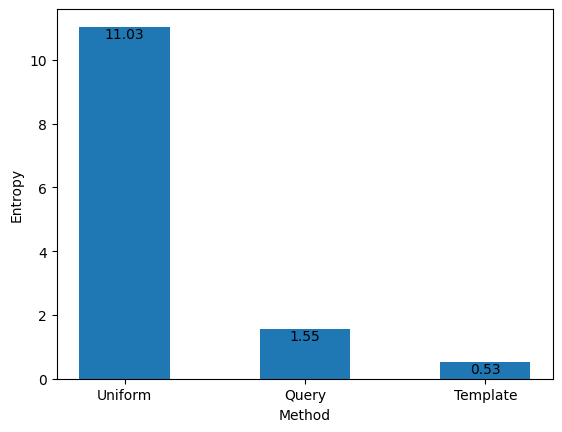

In [426]:
entropies = [uniform_entropy, query_entropy, template_entropy]

fig, ax = plt.subplots()
ax.bar(
    ['Uniform', 'Query', 'Template'], 
    entropies, 
    width=0.5
)

for i, value in enumerate(entropies):
    ax.text(i, value, f"{value:.2f}", ha='center', va='top')

ax.set_ylabel('Entropy')
ax.set_xlabel('Method')
# plt.show()

plt.savefig('entropy.jpg')